# Área, perímetro, área envolvente y volumen de superficies magnéticas.

En  este código se busca encontrar el área, perímetro, área envolvente y volúmen del plasma dentro del SCR-1.

![all text](https://drive.google.com/uc?id=1nvD4SaG-oukfnTd5L9s78LTn8LkDu1aP)

Específicamente se quiere encontrar estas características en superficies magnéticas con formas similares a (toropath0085):

![all text](https://drive.google.com/uc?id=1aRuJhI7miOOtj-a09DLsF8bGaUtC9BFv)

Que forman parte del siguiente conjunto de superficies, dado un ángulo toroidal:

![all text](https://drive.google.com/uc?id=1fFSVerSQGhsiPQ3at5hxKsHsp81GVv4A)





In [47]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [48]:
archivo ="C:/Users/Dell/Estudiantes ITCR/Team Channel - Top Secret/Codes/resultstoroidal/torpath0085.txt" # Toropath0085
carpeta = "C:/Users/Dell/Estudiantes ITCR/Team Channel - Top Secret/Codes/resultstoroidal/"
angulo = 0

## Cálculo del Área

En este método se cálcula el área de la última superficie de contorno del plasma, no obstante se puede aplicar el método a otras superficies internas excluyendo unicamente a superficies altamente irregulares como lo son las islas magnéticas.

Lo que se realiza consta de:

> Obtener los datos en coordenadas [R,z].

> Separar los datos en z positivos y negativos.

> Ordenar los datos en orden de R ascendente, tanto positivos como negativos.

> Generar una ecuación de mejor ajuste paras los datos positivos y negativos.

> Integrar y evaluar las ecuaciones de mejor ajuste para obtener el área.

> Validar con el método del trapecio.

In [49]:
def DatosPositivosNegativos(archivo, angulo):
    angulo_rad = angulo*np.pi/180
    dphi = 0.01
    phi_up = angulo_rad + dphi/2
    phi_down = angulo_rad - dphi/2
    R0 = 0.2477 #Radio característico del SCR-1
    data = np.loadtxt(archivo,skiprows=2, delimiter='\t')
    Coord = []
    iRange, _ = data.shape

    #Datos con Bphi
    for i in range(iRange):
        if data[i,1] > phi_down and data[i,1] < phi_up:
            rtor = data[i,0]
            thetator = data[i,2]
            R = R0+rtor*np.cos(thetator)
            z = rtor*np.sin(thetator)
            Coord.append([R,z])
    Coord.sort(key = lambda x:x[0])
    
    #Datos positivos y negativos
    datos = np.array(Coord)
    datos_p = []
    datos_n = []

    for i in range(len(datos)):
        if datos[i,1]>0:
            datos_p.append(datos[i])
        else:
            datos_n.append(datos[i])
    return np.array(datos_p),np.array(datos_n)

In [50]:
def AreaPolinomios(archivo,angulo):
    PolyP, PolyN = DatosPositivosNegativos(archivo, angulo)


    fit_PolyP = np.polyfit(PolyP[:,0],PolyP[:,1],deg=50)
    fit_PolyN = np.polyfit(PolyN[:,0],PolyN[:,1], deg=50)


    areaP = np.polyval(np.polyint(fit_PolyP), np.max(PolyP[:,0])) - np.polyval(np.polyint(fit_PolyP), np.min(PolyP[:, 0]))
    areaN = -1*(np.polyval(np.polyint(fit_PolyN), np.max(PolyN[:,0])) - np.polyval(np.polyint(fit_PolyN), np.min(PolyN[:, 0])))

    area = areaP + areaN
    plt.plot(PolyP[:,0],PolyP[:,1])
    plt.plot(PolyN[:,0],PolyN[:,1])
    plt.ylabel("z [m]")
    plt.xlabel("R [m]")
    plt.title("z vs R, ángulo ="+str(angulo)+"º")
    plt.text(0.22,0.06, "Área="+"{0:.4f}".format(area))
    plt.show
    
    return area

<ipython-input-51-ff9ffdc8bf45>:1: RankWarning: Polyfit may be poorly conditioned
  AreaPolinomios(archivo, 270)
<ipython-input-51-ff9ffdc8bf45>:1: RankWarning: Polyfit may be poorly conditioned
  AreaPolinomios(archivo, 270)


0.0060745636583305895

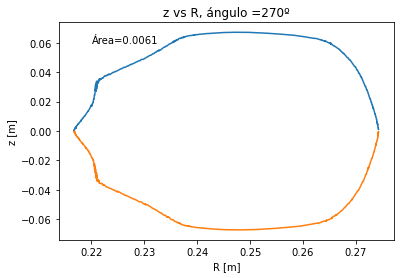

In [51]:
AreaPolinomios(archivo, 270)

In [52]:
def AreaTrapz(archivo,angulo):
    datosP, datosN = DatosPositivosNegativos(archivo,angulo)

    areaP = np.trapz(datosP[:,1],datosP[:,0])
    areaN = -1*(np.trapz(datosN[:,1],datosN[:,0]))

    area = areaP+areaN

    #plt.plot(datosP[:,0],datosP[:,1])
    #plt.plot(datosN[:,0],datosN[:,1])
    #plt.ylabel("z [m]")
    #plt.xlabel("R [m]")
    #plt.title("z vs R, ángulo ="+str(angulo)+"º")
    #plt.text(0.22,0.06, "Área="+"{0:.4f}".format(area))
    #plt.show()
    return area

In [53]:
AreaTrapz(archivo,300)

0.005686474508435565

## Cálculo del Perímetro

En este método se cálcula el perímetro de la última superficie de contorno del plasma, no obstante se puede aplicar el método a otras superficies internas excluyendo unicamente a superficies altamente irregulares como lo son las islas magnéticas.

Lo que se realiza consta de:

> Obtener los datos en coordenadas [R,z].

> Separar los datos en z positivos y negativos.

> Ordenar los datos en orden de R ascendente, tanto positivos como negativos.

> Encontrar la distancia entre puntos adyacentes

> Iterar para encontra el perímetro


In [54]:
def DatosPerimetro(archivo, angulo):
    angulo_rad = angulo*np.pi/180
    dphi = 0.01
    phi_up = angulo_rad + dphi/2
    phi_down = angulo_rad - dphi/2
    R0 = 0.2477 #Radio característico del SCR-1
 
    data = np.loadtxt(archivo,skiprows=2, delimiter='\t')
    Coord = []
    iRange, _ = data.shape

    #Datos con Bphi
    for i in range(iRange):
        if data[i,1] > phi_down and data[i,1] < phi_up:
            rtor = data[i,0]
            thetator = data[i,2]
            R = R0+rtor*np.cos(thetator)
            z = rtor*np.sin(thetator)
            Coord.append([R,z,thetator])
    Coord.sort(key = lambda x:x[2], reverse= True)
    
    #Datos positivos y negativos
    datos = np.array(Coord)
    datos_p = []
    datos_n = []

    for i in range(len(datos)):
        if datos[i,1]>0:
            datos_p.append(datos[i])
        else:
            datos_n.append(datos[i])
    return np.array(datos_p),np.array(datos_n)

In [55]:
def Perimetro(archivo,angulo):
    datosP, datosN = DatosPerimetro(archivo,angulo)

    perimetroP = 0
    for i in range(1,len(datosP)):
        dr_i = datosP[i,0]-datosP[i-1,0]
        dz_i = datosP[i,1]-datosP[i-1,1]
        dp_i = np.sqrt((dr_i)**2+(dz_i)**2)
        perimetroP = perimetroP + dp_i

    perimetroN = 0
    for j in range(1, len(datosN)):
        dr_j = datosN[j,0]-datosN[j-1,0]
        dz_j = datosN[j,1]-datosN[j-1,1]
        dp_j = np.sqrt(dr_j**2+dz_j**2)
        perimetroN = perimetroN + dp_j

    perimetro = perimetroP + perimetroN

    return perimetro

In [56]:
Perimetro(archivo,15)

0.36831786427457963

## Área envolvente 

En este caso se busca encontrar el área de la superficie externa de la "dona" o toroide que se caracteriza por la última superficie de contorno, el código también es válido para superficies internas a excepsión de las islas magnéticas.

La idea fundamental detras del cálculo del área envolvente está en los solidos de revolución y el teoréma de Papus y Guldinos que establece que:

$$A = \theta \widetilde{r}P$$

Donde:

> $A$ corresponde al área de reovolución.

> $\theta$ es el ángulo de revolución medido en radianes.

> $\widetilde{r}$ es la distancia perpendicular entre el eje de revolución y el centro geométrico de la curva generatriz.

> $P$ es el perímetro de curva generatriz.


Para este cálculo se sabe que para todas las curvas generatrices $\widetilde{r}$ correponde al radio característicos del SCR-1.

Debido a la naturaleza del problema lo que se busca hacer es una sumatoria de pequeñas áreas de revolución hasta llegar a completar la dona.

Dado a que al hacer pequeñas revoluciones no va a haber cambios bruscos en el perímetro se puede generar una buena aproximación al valor verdadero del área de la envolvente. De esta forma se tiene que entre más pequeñas revoluciones se generen, mayor será la exactitud del cálculo.

El procedimiento general consiste en:

> Hacer áreas de revolución de un grado y sumar todas estas áreas para obtener una aproximación del área total.

> Para esto se calcula el perímetro en 0º, 1º, 2º,....,360º 

> Estos perímtros se multiplican por $(\pi/180)\cdot R_{0}$ para generar aumentos de un grado.

### Se utiliza la función que calcula el perímetro. 

In [57]:
def AreaEnvolvente(archivo):
    area = 0
    theta = np.pi/180
    R0 = 0.2477
    for angulo in range(360):
        p = Perimetro(archivo,angulo)
        area = theta*R0*p + area
    
    return area

In [58]:
AreaEnvolvente(archivo)

0.5888880684712461

## Cálculo del volumen

En este caso se busca encontrar el volumen determinado por una superficie magnética, preferiblemente dada por la última superficie de contorno no obstante el código también es válido para superficies internas a excepsión de las islas magnéticas.

La idea fundamental detras del cálculo del volumen está en los solidos de revolución y el teoréma de Papus y Guldinos que establece que:

$$V = \theta \widetilde{r}A$$

Donde:

> $V$ corresponde al volumen de reovolución.

> $\theta$ es el ángulo de revolución medido en radianes.

> $\widetilde{r}$ es la distancia perpendicular entre el eje de revolución y el centro geométrico de la curva generatriz.

> $A$ es el área de la curva generatriz.


Para este cálculo se sabe que para todas las curvas generatrices $\widetilde{r}$ correponde al radio característicos del SCR-1.

Debido a la naturaleza del problema lo que se busca hacer es una sumatoria de pequeñas volúmenes de revolución hasta llegar a completar el toroide.

Dado a que al hacer pequeñas revoluciones no va a haber cambios bruscos en el área se puede generar una buena aproximación al valor verdadero del volumen. De esta forma se tiene que entre más pequeños volúmenes de revoluciones se generen, mayor será la exactitud del cálculo.

El procedimiento general consiste en:

> Hacer volúmenes de revolución de un grado y sumar todos estos para obtener una aproximación del volumen total.

> Para esto se calcula el área en 0º, 1º, 2º,....,360º 

> Estas áreas se multiplican por $(\pi/180)\cdot R_{0}$ para generar aumentos de un grado.

### Se utiliza la función que calcula el área. 

In [59]:
def Volumen(archivo):
    vol = 0
    theta = np.pi/180
    R0 = 0.2477
    for angulo in range(360):
        area = AreaTrapz(archivo,angulo) 
        vol = theta*R0*area + vol
    
    return vol

In [60]:
Volumen(archivo)

0.008506042819360817